In [316]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [319]:
# Read in the cleaned training dataset
df = pd.read_csv('../datasets/train_clean_features.csv')

In [320]:
df.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,109,0.0,13517,3,4,3,6,8,1976,2005,...,0,0,0,0,0,0,0,0,0,1
1,544,43.0,11492,3,4,3,7,5,1996,1997,...,0,0,0,0,0,0,0,0,1,0
2,153,68.0,7922,4,4,3,5,7,1953,2007,...,0,0,0,0,0,0,0,0,0,1
3,318,73.0,9802,4,4,3,5,5,2006,2007,...,0,0,0,0,0,0,0,0,0,1
4,255,82.0,14235,3,4,3,6,8,1900,1993,...,0,0,0,0,0,0,0,0,0,1


In [321]:
# Drop Id column
df.drop(columns='Id', inplace=True)

In [322]:
# Set X and y
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [323]:
X.shape

(2047, 232)

In [324]:
# Calculate the log of our target variable
y_log = np.log(y)

# Create Polynomial Features

In [325]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

X_overfit.shape

# This and some of the following code was adapted from our regularization lesson

(2047, 27260)

In [326]:
X_overfit = pd.DataFrame(X_overfit,columns=poly.get_feature_names(X.columns))
X_overfit.shape

(2047, 27260)

In [327]:
cor = X_overfit.corrwith(y_log)
#Correlation with target variable
cor_target = abs(cor)

#selecting features with correlation strength of 0.2 or above
relevant_features = cor_target[cor_target>0.8].sort_values(ascending=False)
relevant_features = list(relevant_features.index)
X_overfit_heat = X_overfit[relevant_features]
relevant_features

# Looked up corrwith documentation because running all correlations took too long

['Overall Qual Gr Liv Area',
 'Overall Qual Year Built',
 'Overall Qual Year Remod/Add',
 'Overall Qual',
 'Utilities Overall Qual',
 'Overall Qual Electrical',
 'Overall Qual Kitchen Qual',
 'Overall Qual Street_Pave',
 'Bsmt Qual Gr Liv Area',
 'Overall Qual^2',
 'Overall Qual Total Bath',
 'Overall Qual Exter Qual',
 'Exter Qual Gr Liv Area',
 'Overall Qual Bsmt Qual',
 'Overall Qual Garage Cars',
 'Gr Liv Area Kitchen Qual',
 'Overall Qual 1st Flr SF']

In [328]:
# Merge y_log variable for correlation
X_overfit_heat = X_overfit_heat.merge(y_log, left_index=True, right_index=True)

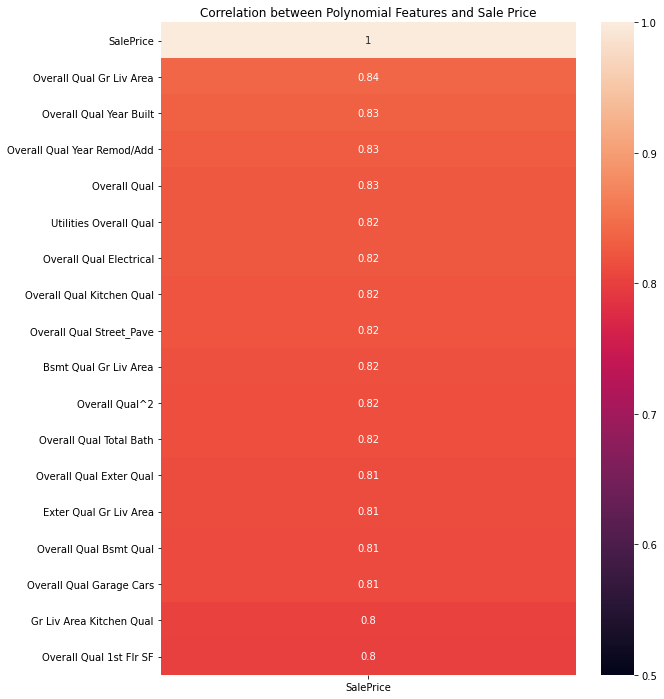

In [329]:

plt.figure(figsize = (12, 12))
corr = X_overfit_heat.corr()
corr_sort = corr.sort_values(by = ['SalePrice'], axis = 0, ascending = False)
corr_sort
sns.heatmap(corr_sort[['SalePrice']], annot=True, vmin = .5, vmax=1)
plt.title('Correlation between Polynomial Features and Sale Price')
plt.subplots_adjust(left=0.3)

plt.savefig("../figs/poly_corr_heatmap.png");



In [330]:
# Only ended up using the top 3 interaction features produced
poly_features = relevant_features[0:3]

In [331]:
# Subset the dataframe to only the interaction features we want to include
X_poly_features = X_overfit[poly_features]
X_poly_features

,Overall Qual Gr Liv Area,Overall Qual Year Built,Overall Qual Year Remod/Add
0,8874.0,11856.0,12030.0
1,14854.0,13972.0,13979.0
2,5285.0,9765.0,10035.0
3,7220.0,10030.0,10035.0
4,8670.0,11400.0,11958.0
...,...,...,...
2042,13824.0,16056.0,16056.0
2043,3444.0,7760.0,7800.0
2044,11478.0,11568.0,11700.0
2045,4800.0,7824.0,7824.0


In [332]:
# Merge the interaction features with our X featues
X = X.merge(X_poly_features, left_index=True, right_index=True)

In [333]:
X.shape

(2047, 235)

# Log Transform y - Exploration

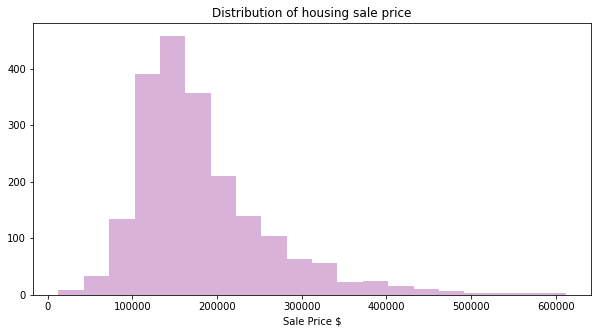

In [338]:
# Plot histograms to log transformation of target variable
# Size
plt.figure(figsize = (10, 5))
# Plot it
# colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.hist(y, color = 'purple', alpha=0.3, bins=20)
#df_train['SalePrice'].plot(kind = "kde", color='purple')




# Create a descriptive title
plt.title('Distribution of housing sale price')
# Do we need axis lables here?
plt.xlabel('Sale Price $')

plt.savefig('../figs/price_hist.png')

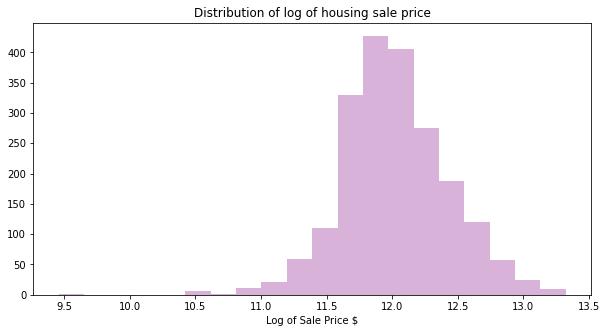

In [339]:
# Histogram of y_log to show log transformation
# Size
plt.figure(figsize = (10, 5))
# Plot it
# colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.hist(y_log, color = 'purple', alpha=0.3, bins=20)
#df_train['SalePrice'].plot(kind = "kde", color='purple')




# Create a descriptive title
plt.title('Distribution of log of housing sale price')
# Do we need axis lables here?
plt.xlabel('Log of Sale Price $')

plt.savefig('../figs/log_price_hist.png')

# Save X and y to csv for modeling steps

In [336]:
X_y_df = X.merge(y, left_index=True, right_index=True)

In [337]:
X_y_df.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Mo Sold_11,Mo Sold_12,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010,Overall Qual Gr Liv Area,Overall Qual Year Built,Overall Qual Year Remod/Add,SalePrice
0,0.0,13517,3,4,3,6,8,1976,2005,289.0,...,0,0,0,0,0,1,8874.0,11856.0,12030.0,130500.0
1,43.0,11492,3,4,3,7,5,1996,1997,132.0,...,0,0,0,0,1,0,14854.0,13972.0,13979.0,220000.0
2,68.0,7922,4,4,3,5,7,1953,2007,0.0,...,0,0,0,0,0,1,5285.0,9765.0,10035.0,109000.0
3,73.0,9802,4,4,3,5,5,2006,2007,0.0,...,0,0,0,0,0,1,7220.0,10030.0,10035.0,174000.0
4,82.0,14235,3,4,3,6,8,1900,1993,0.0,...,0,0,0,0,0,1,8670.0,11400.0,11958.0,138500.0


In [340]:
X_y_df.to_csv('../datasets/X_y_features.csv', index=False)